# Types of Databases

<img src="https://www.agiratech.com/wp-content/uploads/2018/06/Relational-vs-non-relational.jpg" />

### Relational
- Represent and store data in tables and rows.
- Use Structured Query Language (`SQL`), which is like a programming language for relational databases.
- Examples include `SQLite`, `MySQL`, `PostreSQL`, `T-SQL`.

### Non-relational
- Represent and store data as collections of documents, objects, key-value stores, or heirarchal data formats.
- Also known as "NoSQL" databases.
- Examples include `JSON`, `MongoDB`.

# SQL: Structured Query Language

- Programming language for storing, manipulating, and retreiving data stored in a relational database.
- All relational database management systems (e.g. `MySQL`, `SQLite`, `PostgreSQL`) use `SQL` as their standard database landuage.
- `SQL` can have different *dialects* that contain small, subtle differences (just like there are different *accents* in the english language). For example, a string-like data type in `MySQL` is defined as **`STRING`**, while in `SQLite` it is defined as **`TEXT`**. 
- However, the vast majority of `SQL` is the same in all relational database management systems.

# What will we learn?

In this lesson, we will learn how to retreive astronomical data from a `SQLite` database.

- How to retrieve data from a database
- How to select a subset of the data
- How to sort a query's results
- How to combine data from multiple tables

We will first learn how to do this through the `SQLite` command line interface, then we will learn how to accomplish the same tasks using Python.

# The `hipparcos.db` Database

In this lesson, we will use with the `hipparcos.db` database, which stores data from the Extended Hipparcos Compilation (XHIP).  

It contains:
- Spectral classificaitons
- Radial velocities
- Iron abundances
- Stellar classifications
- Stellar ages
- 2MASS photometry

The database can be downloaded from this URL:

https://www.dropbox.com/s/o80up2k4h3z7uud/hipparcos.db?dl=0

This database contains two tables, named `data` and `photometry`.  The `data` table stores astrometry, spectroscopy, space motions, and exoplanet indications.  The `photometry` tables stores photometry information.

# Opening and Navigating the Database

To connect to the database, we can use the `sqlite3` command line interface:

```
>>> sqlite3 hipparcos.db
```

```
SQLite version 3.13.0 2016-05-18 10:57:30
Enter ".help" for usage hints.
```

**Excercise 1:** Try connecting to the `hipparcos.db` database.  Use the `.help` command to determine which command to use to list the names of tables of the database and run it.

To make the output a bit more human-readable, let's run the following commands:

```
.mode column
.headers on
```

In `sqlite`, we can list the columns of a table using the `PRAGMA table_info()` command:

```
PRAGMA table_info(data);
```

**Excercise 2:** List all of the columns in the `photometry` table.  How many columns are there?

# Selecting everything from a table

```SQL
SELECT *
FROM <table_name>;
```

for example:

```SQL
SELECT *
FROM data;
```

Note that we can also limit the number of results returned:

```SQL
SELECT *
FROM data
LIMIT 10;
```

**Excercise 3:** Write a query that selects all columns from the `photometry` table and limits the results to 50 rows.

*Solution*:

```SQL
SELECT *
FROM photometry
LIMIT 50;
```

# Filtering specific columns

```SQL
SELECT <column1_name>, <column2_name>, ..., <columnN_name>
FROM <table_name>;
```

for example:

```SQL
SELECT HIP, RV, e_RV
FROM data;
```

**Exercise 4**: Write a query that selects the Hipparcos Identifier, the Hipparcos magnitude, and the variability period from the `photometry` table.  You may need to list the table's columns or refer to the documentation to check their column name.

_Solution:_
```SQL
SELECT HIP, Hpmag, Per
FROM photometry;
```

# Filtering specific rows

```SQL
SELECT <column1_name>, <column2_name>, ..., <columnN_name>
FROM <table_name>
WHERE <column_name> <condition>;
```

for example:

```SQL
SELECT HIP, RV, e_RV
FROM data
WHERE RV != 0;
```

More conditions can be added to the query using the `AND` command.  There is no limit to the number of conditions you can put on a query.


```SQL
SELECT <column1_name>, <column2_name>, ..., <columnN_name>
FROM <table_name>
WHERE <column_name> <condition>
AND <column_name> <condition>
...
AND <column_name> <condition>;
```

for example:
```SQL
SELECT HIP, RV, e_RV
FROM data
WHERE RV != 0
AND e_RV < 1;
```

**Exercise 5:** Write a query that selects the Hipparcos indentifier, the Johnson B apparent magnitute, the Johnson V apparent magnitude, and the variability period.  Only select sources whose variability period and B-magnitute are non-zero, and have a B-magnitude less than 10.  

_Solution:_

```SQL
SELECT HIP, Bmag, Vmag, Per
FROM photometry
WHERE Per != 0
AND Bmag != 0
AND Bmag < 10;
```

# Sorting results

```SQL
SELECT <column1_name>, <column2_name>, ..., <columnN_name>
FROM <table_name>
WHERE <column_name> <condition>
AND <column_name> <condition>
...
AND <column_name> <condition>
ORDER BY <column_name>;
```

for example:

```SQL
SELECT HIP, Bmag, Vmag, Per
FROM photometry
WHERE Per != 0
AND Bmag != 0
AND Bmag < 10
ORDER BY Vmag;
```

**Exercise 6:** Write a query that selects the Hipparcos identifer, the Johnson B and V apparent magnitudes, and the variability period.  Only select sources whose V-magnitude is greater than 11, and whose variability type is 'P'.  Order the results by the variability period. 

_Solution:_

```SQL
SELECT HIP, Bmag, Vmag, Per
FROM photometry
WHERE Vmag > 11
AND Hvar = 'P'
ORDER BY Per;
```

# Joining Tables

<img src="https://image.slidesharecdn.com/2-background-140403152126-phpapp02/95/database-2-background-30-638.jpg?cb=1396538564" />

```SQL
SELECT <column1_name>, <column2_name>, ..., <columnN_name>
FROM <table1_name>
JOIN <table2_name> ON <condition>;
```

for example:

```SQL
SELECT data.HIP, pmRA, pmDE, Bmag, Vmag
FROM data
JOIN photometry ON data.HIP = photometry.HIP;
```

Note that `WHERE`, `AND`, and `ORDER BY` conditions can be applied to the query after the `JOIN`, for example:

```SQL
SELECT data.HIP, pmRA, pmDE, Bmag, Vmag
FROM data
JOIN photometry ON data.HIP = photometry.HIP
WHERE Vmag > 11
AND Bmag > 11
ORDER BY Vmag;
```

**Exercise 7:** Using `JOIN`, write a query that selects the Hipparcos identifier and the radial velocity from the `data` table, as well as the Johnson B and V apparent magnitudes from the `photometry` table. Only select sources whose radial velocity are greater than 0, and order the results by the Johnson B magnitude.

_Solution:_

```SQL
SELECT data.HIP, RV, Bmag, Vmag
FROM data
JOIN photometry ON data.HIP = photometry.HIP
WHERE RV > 0
ORDER By Vmag;
```

# Programming with Databases using Python

We have now learned how to retreive, filter, and sort data from a `SQL` database using the `SQLite` command line interface.  The same tasks can be performed in Python, using the `sqlite3` library.

In [1]:
import sqlite3

To connect to the database, we can use the `sqlite3.connect()` method:

In [2]:
connection = sqlite3.connect("/Users/griffin/Downloads/hipparcos.db")

Next, we set up a `cursor` object, which will later allow us to execute `SQL` commands:

In [3]:
cursor = connection.cursor()

Executing a database query is not as simple as passing the hard-coded query to the `cursor.execute()` command:

```python
cursor.execute("<SQL COMMAND>;")
```

For example:

In [4]:
sql_command = """
    SELECT data.HIP, RV, Bmag, Vmag
    FROM data
    JOIN photometry ON data.HIP = photometry.HIP
    WHERE RV > 0
    ORDER BY Bmag
    LIMIT 20;
    """
cursor.execute(sql_command)

To retreive the results of the query, we can use the `cursor.fetchall()` method.  This returns a list of tuples, with each element in the list being a row of results:

In [5]:
results = cursor.fetchall()
for result in results:
    print(result)

(30438, 20.299999237060547, -0.4560000002384186, -0.6200000047683716)
(30438, 20.299999237060547, -0.4560000002384186, -0.6200000047683716)
(30438, 20.299999237060547, -0.4560000002384186, -0.6200000047683716)
(30438, 20.299999237060547, -0.4560000002384186, -0.6200000047683716)
(53, 11.420000076293945, 0.0, 10.960000038146973)
(53, 11.420000076293945, 0.0, 10.960000038146973)
(3937, 6.0, 0.0, 12.010000228881836)
(3937, 6.0, 0.0, 12.010000228881836)
(4725, 57.0, 0.0, 11.800000190734863)
(4725, 57.0, 0.0, 11.800000190734863)
(6115, 130.0, 0.0, 11.630000114440918)
(6115, 130.0, 0.0, 11.630000114440918)
(8939, 24.0, 0.0, 12.369999885559082)
(8939, 24.0, 0.0, 12.369999885559082)
(11517, 9.0, 0.0, 11.850000381469727)
(11517, 9.0, 0.0, 11.850000381469727)
(12886, 28.0, 0.0, 10.800000190734863)
(12886, 28.0, 0.0, 10.800000190734863)
(14574, 11.800000190734863, 0.0, 11.720000267028809)
(14574, 11.800000190734863, 0.0, 11.720000267028809)


With some unpacking, we can get lists of the results:

In [6]:
HIPs = [item[0] for item in results]
RVs = [item[1] for item in results]
Bmags = [item[2] for item in results]
Vmags = [item[3] for item in results]

print(Vmags)

[-0.6200000047683716, -0.6200000047683716, -0.6200000047683716, -0.6200000047683716, 10.960000038146973, 10.960000038146973, 12.010000228881836, 12.010000228881836, 11.800000190734863, 11.800000190734863, 11.630000114440918, 11.630000114440918, 12.369999885559082, 12.369999885559082, 11.850000381469727, 11.850000381469727, 10.800000190734863, 10.800000190734863, 11.720000267028809, 11.720000267028809]


**Exercise 8:**

1. Using `sqlite3` and python, query the database for `B-V` and Absolute V mag (i.e. `VAbsMag`) measurements.
  - Select only sources that are have a Distance error (`e_Dist`) that is non-zero and less than 10. 
  - Also filter out non-zero `B-V` values
  - *Hint: You will need to join the `data` and `photometry` tables.*
  - *Hint: You will need to wrap "B-V" in double-quotes in the `SELECT` statement to avoid errors caused by the minus-sign.*
2. Parse the results by creating a list that holds the `B-V` values and a list that holds the `VabsMag` values.
3. Plot the results using `pyplot`.
  - *Hint: astronomers can invert the y-axis using `ax.invert_yaxis()`.*

**(Bonus) Exercise 9:**

1. Execute the previous query, only this time add conditions to select only white dwarf stars (`"B-V" < 0.7`, `VAbsMag > 10`).
2. Overplot the white dwarf stars on the plot from Excercise 8 using a different marker color.

_Solution 8:_

In [7]:
sql_command = """
SELECT "B-V", VAbsMag
FROM data
JOIN photometry ON data.HIP = photometry.HIP
WHERE e_Dist !=0
AND e_Dist < 10
AND "B-V" != 0;
"""
cursor.execute(sql_command)
results = cursor.fetchall()

BVs = [item[0] for item in results]
VAbsMags = [item[1] for item in results]

# The results are too long to print within a Jupyter notebook

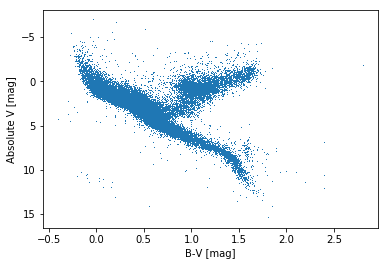

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

ax = plt.axes()
ax.plot(BVs, VAbsMags, ',')
ax.set_xlabel('B-V [mag]')
ax.set_ylabel('Absolute V [mag]')
ax.invert_yaxis()

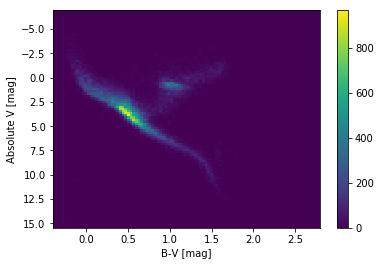

In [9]:
ax2 = plt.axes()
_, _, _, img = ax2.hist2d(BVs, VAbsMags, bins=100)
ax2.invert_yaxis()
ax2.set_xlabel('B-V [mag]')
ax2.set_ylabel('Absolute V [mag]')
plt.colorbar(img)

# Using `astroquery` to Query Online Databases

`astroquery` is an Astropy-affiliated package to query various online astronomical (and other) databases, such as ADS, IRSA, MAST, NED, SDSS, Simbad, and VizieR (full list [here](https://astroquery.readthedocs.io/en/latest/)). If you don't already have it installed, run `conda install -c astropy astroquery`.

In [10]:
from astroquery.irsa_dust import IrsaDust

ext_table = IrsaDust.get_extinction_table('SN 2011fe')
ext_table

Filter_name,LamEff,A_over_E_B_V_SandF,A_SandF,A_over_E_B_V_SFD,A_SFD
,micron,,mag,,mag
str8,float64,float64,float64,float64,float64
CTIO U,0.3734,4.107,0.036,4.968,0.044
CTIO B,0.4309,3.641,0.032,4.325,0.038
CTIO V,0.5517,2.682,0.024,3.24,0.028
CTIO R,0.652,2.119,0.019,2.634,0.023
CTIO I,0.8007,1.516,0.013,1.962,0.017
DSS-II g,0.4621,3.381,0.03,3.907,0.034
DSS-II r,0.6546,2.088,0.018,2.649,0.023
DSS-II i,0.8111,1.487,0.013,1.893,0.017


**Exercise 10:**

Read the documentation for `astroquery.ned`. Use it to look up the name of the galaxy that hosted the kilonova AT 2017gfo. *(Hint: search for galaxies within 20 arcsec of its position.)* What is its redshift?

_Solution:_

In [11]:
from astroquery.ned import Ned
import astropy.units as u

res = Ned.query_region('AT 2017gfo', 20. * u.arcsec)
res.sort('Separation')
res

No.,Object Name,RA,DEC,Type,Velocity,Redshift,Redshift Flag,Magnitude and Filter,Separation,References,Notes,Photometry Points,Positions,Redshift Points,Diameter Points,Associations
,,degrees,degrees,,km / s,,,,arcmin,,,,,,,
int32,bytes30,float64,float64,object,float64,float64,object,object,float64,int32,int32,int32,int32,int32,int32,int32
3,AT 2017gfo,197.45038,-23.38149,VisS,--,--,,,0.0,82,0,0,1,0,0,0
4,[PDB2017] J130948.09-232253.3,197.45038,-23.38147,VisS,--,--,,,0.001,1,0,0,1,0,0,0
1,NGC 4993,197.44875,-23.38389,G,2916.0,0.009727,,13.32,0.17,183,3,27,5,6,17,0
2,NGC 4993 GROUP,197.44875,-23.38389,GGroup,--,--,,,0.17,1,0,0,0,0,0,0
